## **1. Import Library yang Digunakan**

Berikut adalah library yang digunakan dalam proyek klasifikasi teks ini. Setiap library memiliki peran penting dalam tahapan analisis data, mulai dari pemrosesan data hingga pemodelan dan evaluasi.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns # Untuk visualisasi yang lebih menarik
import graphviz # Untuk visualisasi graphviz
import nltk # Untuk pra-pemrosesan teks lebih lanjut
from nltk.stem import WordNetLemmatizer # Untuk lemmatization
from nltk.corpus import stopwords as nltk_stopwords # Untuk custom stop words

# Download resource NLTK yang mungkin dibutuhkan
# Catch the LookupError directly when nltk.data.find fails
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("NLTK resource 'wordnet' not found. Downloading...")
    nltk.download('wordnet')
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'wordnet': {e}")

try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    print("NLTK resource 'omw-1.4' not found. Downloading...")
    nltk.download('omw-1.4') # WordNet multilingual resource
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'omw-1.4': {e}")

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("NLTK resource 'stopwords' not found. Downloading...")
    nltk.download('stopwords')
except Exception as e:
    print(f"An unexpected error occurred while checking/downloading 'stopwords': {e}")


# Pengaturan umum untuk plot agar lebih menarik
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis") # Atau palet lain seperti 'pastel', 'muted'

NLTK resource 'wordnet' not found. Downloading...
NLTK resource 'omw-1.4' not found. Downloading...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Berikut adalah daftar library Python yang di-import untuk menjalankan analisis sentimen menggunakan model Decision Tree ini. Setiap library memainkan peran spesifik dalam alur kerja machine learning, mulai dari pemuatan data, pra-pemrosesan, pemodelan, hingga evaluasi dan visualisasi.

*   `pandas` (`pd`): Digunakan untuk manipulasi dan analisis data tabular, terutama untuk memuat dan mengelola dataset.
*   `numpy` (`np`): Menyediakan dukungan untuk array dan matriks multidimensi besar, bersama dengan kumpulan fungsi matematika tingkat tinggi untuk beroperasi pada array ini.
*   `sklearn.model_selection`:
    *   `train_test_split`: Untuk membagi dataset menjadi set pelatihan dan pengujian.
    *   `GridSearchCV`: Untuk melakukan pencarian hyperparameter terbaik secara sistematis menggunakan cross-validation.
    *   `cross_val_score`: Untuk mengevaluasi performa model menggunakan cross-validation.
*   `sklearn.feature_extraction.text`:
    *   `TfidfVectorizer`: Untuk mengubah koleksi dokumen teks mentah menjadi matriks fitur TF-IDF.
*   `sklearn.tree`:
    *   `DecisionTreeClassifier`: Implementasi algoritma Decision Tree untuk klasifikasi.
    *   `plot_tree`: Untuk memvisualisasikan pohon keputusan secara langsung menggunakan matplotlib.
    *   `export_graphviz`: Untuk mengekspor pohon keputusan dalam format DOT, yang kemudian dapat dirender oleh Graphviz.
*   `sklearn.metrics`:
    *   `accuracy_score`: Untuk menghitung akurasi klasifikasi.
    *   `confusion_matrix`: Untuk menghitung confusion matrix guna mengevaluasi akurasi klasifikasi.
    *   `classification_report`: Untuk membangun laporan teks yang menunjukkan metrik klasifikasi utama (precision, recall, F1-score).
    *   `ConfusionMatrixDisplay`: Untuk memvisualisasikan confusion matrix.
    *   `roc_auc_score` dan `roc_curve`: Untuk mengevaluasi performa model klasifikasi biner menggunakan kurva ROC dan AUC.
*   `matplotlib.pyplot` (`plt`): Library plotting 2D yang komprehensif untuk membuat visualisasi statis, animasi, dan interaktif.
*   `seaborn` (`sns`): Library visualisasi data Python berbasis matplotlib yang menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.
*   `graphviz`: Digunakan untuk merender output dari `export_graphviz` (file DOT) menjadi representasi grafis dari pohon keputusan.
*   `nltk` (Natural Language Toolkit): Platform utama untuk membangun program Python untuk bekerja dengan data bahasa manusia.
    *   `WordNetLemmatizer`: Untuk melakukan lemmatisasi (mengubah kata ke bentuk dasarnya/lemma).
    *   `nltk_stopwords`: Menyediakan daftar stop words umum.

## **2. Import Dataset yang Digunakan**


Dataset yang digunakan dalam analisis sentimen ini adalah `ramadan_labeled_sentiment.csv`. Dataset ini berisi tweet yang berkaitan dengan Ramadan beserta label sentimennya (positif atau negatif) dan skor sentimen lainnya.


In [ ]:
path = 'https://raw.githubusercontent.com/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/refs/heads/main/datasets/ramadan_labeled_sentiment.csv'
df = pd.read_csv(path)

print(f"Dataset berhasil di-load dari: {path}")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

Dataset berhasil di-load dari: https://raw.githubusercontent.com/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/refs/heads/main/datasets/ramadan_labeled_sentiment.csv
Jumlah baris: 836, Jumlah kolom: 8


### **a. Menampilkan 5 baris pertama dataset**

In [ ]:
df.head()

,tweet_clean,Tweet,sentiment,sentiment_scores,neg,neu,pos,compound
0,"['abraj', 'al', 'bait', 'clock', 'tower', 'bea...",abraj al bait clock tower beams indicating com...,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,"['accounts', 'recognised', 'ramadan', 'none', ...",accounts recognised ramadan none recognised be...,negative,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",0.147,0.853,0.000,-0.4767
2,"['admin', 'post', 'peaceful', 'ramadan', 'cele...",admin post peaceful ramadan celebrations east ...,positive,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.000,0.714,0.286,0.4939
3,"['admin', 'post', 'ramadan', 'norway']",admin post ramadan norway,negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,"['admin', 'post', 'ramadan', 'usual', 'peacefu...",admin post ramadan usual peaceful start englan...,positive,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.000,0.775,0.225,0.4939


### **b. Menampilkan informasi umum dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_clean       836 non-null    object 
 1   Tweet             836 non-null    object 
 2   sentiment         836 non-null    object 
 3   sentiment_scores  836 non-null    object 
 4   neg               836 non-null    float64
 5   neu               836 non-null    float64
 6   pos               836 non-null    float64
 7   compound          836 non-null    float64
dtypes: float64(4), object(4)
memory usage: 52.4+ KB


### **c. Menampilkan statistik deskriptif untuk kolom numerik (jika ada yang relevan selain skor sentimen)**

In [ ]:
df.describe(include='all')

,tweet_clean,Tweet,sentiment,sentiment_scores,neg,neu,pos,compound
count,836,836,836,836,836.000000,836.000000,836.000000,836.000000
unique,836,836,2,572,NaN,NaN,NaN,NaN
top,"['zarafshan', 'shiraz', 'hindustan', 'times', ...",zarafshan shiraz hindustan times confirms horm...,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN,NaN,NaN,NaN
freq,1,1,446,226,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.071161,0.710489,0.218349,0.238149
std,NaN,NaN,NaN,NaN,0.126909,0.226460,0.220916,0.486629
min,NaN,NaN,NaN,NaN,0.000000,0.095000,0.000000,-0.976100
25%,NaN,NaN,NaN,NaN,0.000000,0.536000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,0.691500,0.180000,0.202300
75%,NaN,NaN,NaN,NaN,0.115250,1.000000,0.372000,0.659700


### **d. Menampilkan distribusi kelas sentimen**

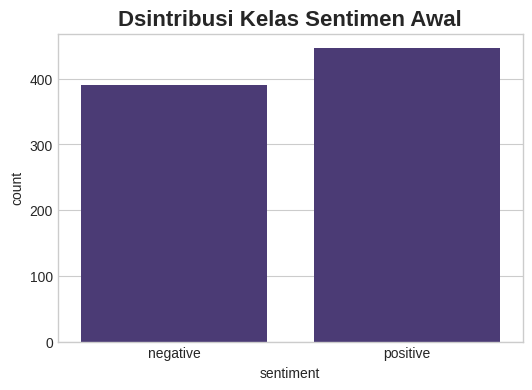

,count
sentiment,
positive,446
negative,390


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment')
plt.title('Dsintribusi Kelas Sentimen Awal', fontsize=16, fontweight='bold')
plt.show()
df['sentiment'].value_counts()

### **e. Menampilkan jumlah dan persentase menggunakan Pie Plot**

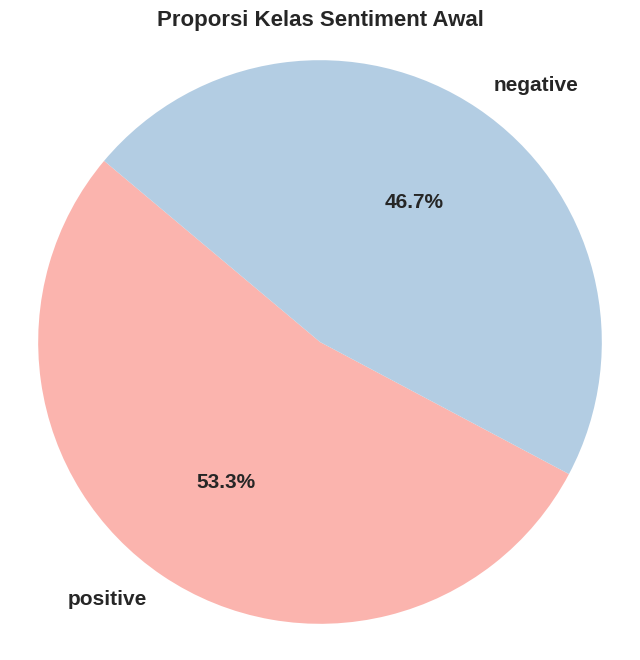


Proporsi Persentase Kelas Sentimen Awal:


,proportion
sentiment,
positive,53.349282
negative,46.650718


In [ ]:
# palet warna untuk visualisasi (opsional, jika ingin mengganti palet)
# selected_palette = 'magma'
# sns.set_palette(selected_palette)

sentiment_counts = df['sentiment'].value_counts()
# Mengambil label indeks (0 dan 1)
sentiment_labels_raw = sentiment_counts.index
# Mengganti label angka 0 dan 1 dengan teks yang lebih deskriptif jika diinginkan
sentiment_labels_display = ['Negative', 'Positive'] # Bisa digunakan jika ingin teks 'Negative', 'Positive'

plt.figure(figsize=(8, 8))

# Membuat pie plot dan menangkap objek wedges (slice) dan teks
wedges, texts, autotexts = plt.pie(
    sentiment_counts,
    labels=sentiment_labels_raw, # Menggunakan label indeks (0 dan 1)
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Pastel1'),
    textprops=dict(fontsize=15) # Atur ukuran font untuk semua teks (label dan persentase)
)

# Membuat label di luar lingkaran menjadi bold
for text in texts:
    text.set_fontweight('bold')

# Membuat persentase di dalam lingkaran menjadi bold dan mungkin sedikit lebih besar
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(15)

plt.title('Proporsi Kelas Sentiment Awal', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

print("\nProporsi Persentase Kelas Sentimen Awal:")
display(df['sentiment'].value_counts(normalize=True) * 100)

## **- Tahap Pra-Pemrosesan Data (Data Preprocessing)**


Meskipun tidak secara eksplisit diminta dalam urutan nomor 1-6, tahap ini sangat penting untuk menyiapkan data sebelum dilakukan pemodelan.
Ini mencakup:
1. Konversi label sentimen kategorikal menjadi numerik.
2. Pengecekan dan penanganan nilai yang hilang (jika ada).
3. Pemrosesan kolom `tweet_clean` yang berisi list kata menjadi string tunggal agar dapat diproses oleh `TfidfVectorizer`.

### **a. Konversi Label Sentimen ke Numerik**

Label sentimen yang awalnya 'positive' dan 'negative' akan diubah menjadi representasi numerik (misalnya, 1 untuk positif dan 0 untuk negatif) agar dapat digunakan oleh model machine learning.

In [ ]:
print("Label sentimen sebelum konversi:")
print(df['sentiment'].unique()) # Menampilkan nilai unik sebelum mapping

df['sentiment_label'] = df['sentiment'].copy() # Simpan label asli untuk referensi
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative' : 0})

print("\nLabel sentimen setelah konversi ke numerik (0 dan 1):")
print(df['sentiment'].unique()) # Menampilkan nilai unik setelah mapping
display(df[['Tweet', 'sentiment_label', 'sentiment']].head())

Label sentimen sebelum konversi:
['negative' 'positive']

Label sentimen setelah konversi ke numerik (0 dan 1):
[0 1]


,Tweet,sentiment_label,sentiment
0,abraj al bait clock tower beams indicating com...,negative,0
1,accounts recognised ramadan none recognised be...,negative,0
2,admin post peaceful ramadan celebrations east ...,positive,1
3,admin post ramadan norway,negative,0
4,admin post ramadan usual peaceful start englan...,positive,1


### **b. Penanganan Missing Values:**


Sangat penting untuk memeriksa apakah ada nilai yang hilang dalam dataset, terutama pada kolom yang akan digunakan untuk fitur (`tweet_clean`) dan target (`sentiment`).


Jumlah missing values per kolom sebelum penanganan:

In [ ]:
df.isnull().sum()

,0
tweet_clean,0
Tweet,0
sentiment,0
sentiment_scores,0
neg,0
neu,0
pos,0
compound,0
sentiment_label,0


Sepertinya tidak ada missing value pada semua kolom pada dataset, maka kita bisa lanjut ke tahap berikutnya.

### **c. Pemrosesan Kolom Teks Fitur (Lemmatization dan Stop Word Removal):**


Kolom `tweet_clean` saat ini tampaknya berisi string yang merepresentasikan list. Ini perlu diubah menjadi string tunggal dari kata-kata yang digabungkan.


In [ ]:
# Fungsi untuk menggabungkan list kata menjadi string
def join_text_list(text_list_str):
    if isinstance(text_list_str, str):
        try:
            actual_list = eval(text_list_str)
            if isinstance(actual_list, list):
                return ' '.join(actual_list)
            else:
                # Jika eval menghasilkan bukan list (misalnya, sudah string utuh)
                return str(text_list_str) # Kembalikan sebagai string
        except Exception: # Tangkap error lebih umum dari eval
            return str(text_list_str) # Kembalikan string aslinya jika eval gagal
    elif isinstance(text_list_str, list):
        return ' '.join(text_list_str)
    return str(text_list_str) # Pastikan output selalu string

df['text_processed_raw'] = df['tweet_clean'].apply(join_text_list)

# Inisialisasi Lemmatizer dan Stop Words
lemmatizer = WordNetLemmatizer()
english_stopwords = set(nltk_stopwords.words('english'))
# Anda bisa tambahkan custom stop words di sini jika perlu
# custom_stopwords = {'ramadan', 'mubarak', ...}
# all_stopwords = english_stopwords.union(custom_stopwords)

def preprocess_text_advanced(text):
    if not isinstance(text, str): # Pastikan input adalah string
        return ""
    words = text.split() # Tokenisasi sederhana
    # Lemmatisasi dan penghapusan stop words
    processed_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in english_stopwords and word.isalpha()] # Hanya ambil kata alpha
    return ' '.join(processed_words)

print("\nMenerapkan pra-pemrosesan teks lanjutan (lemmatization, stop word removal)...")
df['text_processed'] = df['text_processed_raw'].apply(preprocess_text_advanced)

print("\nContoh hasil 'text_processed' setelah pra-pemrosesan lanjutan:")
display(df[['tweet_clean', 'text_processed_raw', 'text_processed']].head())


Menerapkan pra-pemrosesan teks lanjutan (lemmatization, stop word removal)...

Contoh hasil 'text_processed' setelah pra-pemrosesan lanjutan:


,tweet_clean,text_processed_raw,text_processed
0,"['abraj', 'al', 'bait', 'clock', 'tower', 'bea...",abraj al bait clock tower beams indicating com...,abraj al bait clock tower beam indicating comm...
1,"['accounts', 'recognised', 'ramadan', 'none', ...",accounts recognised ramadan none recognised be...,account recognised ramadan none recognised beg...
2,"['admin', 'post', 'peaceful', 'ramadan', 'cele...",admin post peaceful ramadan celebrations east ...,admin post peaceful ramadan celebration east l...
3,"['admin', 'post', 'ramadan', 'norway']",admin post ramadan norway,admin post ramadan norway
4,"['admin', 'post', 'ramadan', 'usual', 'peacefu...",admin post ramadan usual peaceful start englan...,admin post ramadan usual peaceful start englan...


## **- Tahap Ekstraksi Fitur (TF-IDF Vectorization)**

Setelah pra-pemrosesan dasar, teks perlu diubah menjadi format numerik yang dapat dipahami oleh model. TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik yang umum digunakan untuk ini.


In [ ]:
# Kita bisa coba tuning parameter TF-IDF ini nantinya jika akurasi masih kurang
tfidf = TfidfVectorizer(
    max_features=1500,    # Coba tingkatkan jumlah fitur
    ngram_range=(1, 2),   # Tetap pertimbangkan unigram dan bigram
    stop_words='english', # Stop words sudah ditangani sebagian di pra-pemrosesan, tapi bisa tetap di sini
    min_df=3,             # Abaikan term yang muncul di kurang dari 3 dokumen
    max_df=0.9            # Abaikan term yang muncul di lebih dari 90% dokumen (terlalu umum)
)

X = tfidf.fit_transform(df['text_processed'])
y = df['sentiment'].astype(int) # Pastikan y adalah integer

print(f"Shape dari matriks fitur X (setelah TF-IDF): {X.shape}")
print(f"Shape dari vektor target y: {y.shape}")

# Menampilkan jumlah fitur aktual yang digunakan
print(f"Jumlah fitur aktual yang digunakan oleh TF-IDF: {len(tfidf.get_feature_names_out())}")
print("\nContoh beberapa fitur teratas:")
print(list(tfidf.get_feature_names_out())[:20])

Shape dari matriks fitur X (setelah TF-IDF): (836, 937)
Shape dari vektor target y: (836,)
Jumlah fitur aktual yang digunakan oleh TF-IDF: 937

Contoh beberapa fitur teratas:
['able', 'abu', 'accept', 'accepted', 'according', 'account', 'act', 'act worship', 'action', 'activist', 'activity', 'additionally', 'admin', 'admin post', 'ago', 'ah', 'ahead', 'ahmed', 'aid', 'al']


## **3. Pemrosesan Pembagian (Split Data) Data Training dan Data Testing**


Dataset akan dibagi menjadi dua bagian: data training (untuk melatih model) dan data testing (untuk menguji performa model pada data yang belum pernah dilihat sebelumnya).


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,  # 25% data digunakan untuk testing
    random_state=42,  # Untuk reproduktifitas hasil
    stratify=y  # Mempertahankan proporsi kelas sentimen pada data training dan testing
)

print("Ukuran Data Setelah Pembagian:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

print("\nDistribusi kelas pada data training (proporsi):")
print(y_train.value_counts(normalize=True))
print(y_train.value_counts())

print("\nDistribusi kelas pada data testing (proporsi):")
print(y_test.value_counts(normalize=True))
print(y_test.value_counts())

Ukuran Data Setelah Pembagian:
X_train shape: (627, 937), y_train shape: (627,)
X_test shape: (209, 937), y_test shape: (209,)

Distribusi kelas pada data training (proporsi):
sentiment
1    0.532695
0    0.467305
Name: proportion, dtype: float64
sentiment
1    334
0    293
Name: count, dtype: int64

Distribusi kelas pada data testing (proporsi):
sentiment
1    0.535885
0    0.464115
Name: proportion, dtype: float64
sentiment
1    112
0     97
Name: count, dtype: int64


## **4. Pemodelan Decision Tree (Perhitungan Entropy sampai dengan Information Gain)**


Model Decision Tree akan dilatih menggunakan data training. Scikit-learn secara internal menangani perhitungan entropy/information gain saat membangun pohon. Kita akan menggunakan `GridSearchCV` untuk menemukan hyperparameter terbaik untuk model Decision Tree.


Pelatihan Model dengan Hyperparameter Tuning

In [ ]:
# Mendefinisikan grid parameter yang akan diuji, dengan rentang yang lebih luas
# dan penambahan class_weight untuk menangani potensi imbalance
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50], # Perluas sedikit
    'min_samples_split': [2, 5, 10, 15, 20], # Perluas sedikit
    'min_samples_leaf': [1, 2, 4, 6, 8],    # Perluas sedikit
    'class_weight': [None, 'balanced'] # Untuk menangani imbalance kelas
    # 'ccp_alpha': [0.0, 0.001, 0.005, 0.01] # Cost-Complexity Pruning, bisa dicoba
}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=5, # 5-fold cross-validation
    scoring='accuracy', # Metrik evaluasi utama
    n_jobs=-1, # Gunakan semua core CPU
    verbose=1 # Tampilkan log
)

print("Memulai GridSearchCV untuk Decision Tree...")
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_
print("\nGridSearchCV selesai.")

print("Parameter terbaik yang ditemukan untuk Decision Tree:")
print(grid_search_dt.best_params_)

print(f"\nSkor akurasi cross-validation terbaik untuk Decision Tree: {grid_search_dt.best_score_:.4f}")

print("\nPenjelasan Terkait Pemilihan Split pada Decision Tree:")
print("Model Decision Tree yang dilatih menggunakan kriteria impurity untuk menentukan split terbaik pada setiap node.")
print(f"Kriteria impurity yang dipilih oleh GridSearchCV untuk model terbaik ini adalah: '{best_dt_model.criterion}'.")
if best_dt_model.criterion == 'entropy':
    print("   - Dengan kriteria 'entropy', model bertujuan untuk memaksimalkan Information Gain.")
    print("   - Information Gain mengukur pengurangan ketidakpastian setelah dataset di-split berdasarkan sebuah atribut.")
    print("   - Dihitung sebagai: IG(D, A) = Entropy(D) - Σ (|Dv| / |D|) * Entropy(Dv).")
elif best_dt_model.criterion == 'gini':
    print("   - Dengan kriteria 'gini', model bertujuan untuk meminimalkan Gini Impurity.")
    print("   - Gini Impurity mengukur probabilitas kesalahan klasifikasi jika sebuah elemen acak dari set labelnya ditebak secara acak sesuai distribusi label di set tersebut.")
    print("   - Dihitung sebagai: Gini(D) = 1 - Σ (pi)^2.")
print("Algoritma seperti ID3, C4.5 (menggunakan Information Gain atau Gain Ratio), dan CART (menggunakan Gini Index) adalah implementasi dari konsep ini.")
print("Scikit-learn mengimplementasikan versi optimasi dari algoritma CART untuk Decision Trees.")

Memulai GridSearchCV untuk Decision Tree...
Fitting 5 folds for each of 600 candidates, totalling 3000 fits

GridSearchCV selesai.
Parameter terbaik yang ditemukan untuk Decision Tree:
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 20}

Skor akurasi cross-validation terbaik untuk Decision Tree: 0.7177

Penjelasan Terkait Pemilihan Split pada Decision Tree:
Model Decision Tree yang dilatih menggunakan kriteria impurity untuk menentukan split terbaik pada setiap node.
Kriteria impurity yang dipilih oleh GridSearchCV untuk model terbaik ini adalah: 'entropy'.
   - Dengan kriteria 'entropy', model bertujuan untuk memaksimalkan Information Gain.
   - Information Gain mengukur pengurangan ketidakpastian setelah dataset di-split berdasarkan sebuah atribut.
   - Dihitung sebagai: IG(D, A) = Entropy(D) - Σ (|Dv| / |D|) * Entropy(Dv).
Algoritma seperti ID3, C4.5 (menggunakan Information Gain atau Gain Ratio), dan CART (menggunakan Gini

## **5. Tampilkan Hasil Akurasi dan Tabel Confusion Matrix**


Setelah model dilatih, performanya akan dievaluasi menggunakan data testing.


### **a. Prediksi pada Data Testing dan Laporan Klasifikasi:**


In [ ]:
# Prediksi pada data testing
y_pred_dt = best_dt_model.predict(X_test)
y_pred_proba_dt = best_dt_model.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas positif

# Akurasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Model Decision Tree pada Data Testing: {accuracy_dt:.4f}")

# ROC AUC Score
try:
    roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
    print(f"ROC AUC Score Decision Tree: {roc_auc_dt:.4f}")
except ValueError:
    print("ROC AUC Score tidak dapat dihitung (mungkin hanya satu kelas yang diprediksi).")


# Laporan Klasifikasi
print("\nLaporan Klasifikasi Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=['Negative (0)', 'Positive (1)']))

Akurasi Model Decision Tree pada Data Testing: 0.7033
ROC AUC Score Decision Tree: 0.7365

Laporan Klasifikasi Decision Tree:
              precision    recall  f1-score   support

Negative (0)       0.64      0.81      0.72        97
Positive (1)       0.79      0.61      0.69       112

    accuracy                           0.70       209
   macro avg       0.72      0.71      0.70       209
weighted avg       0.72      0.70      0.70       209



## **b. Hasil (Parameter Terbaik dan Penjelasan Implisit Entropy/Information Gain):**


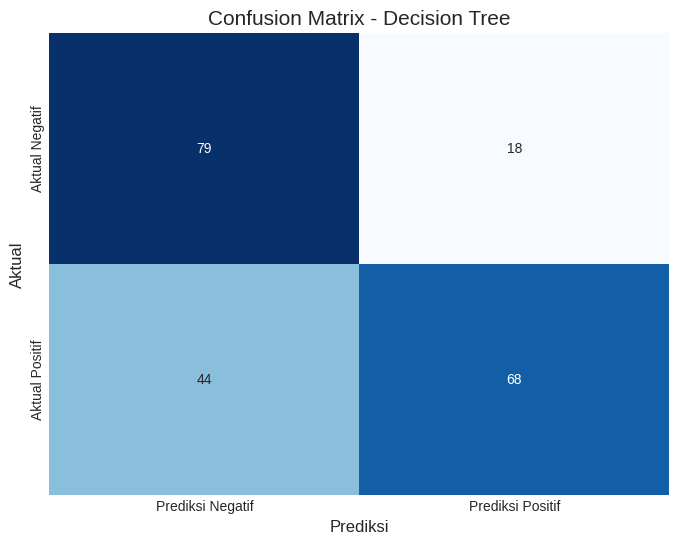


Interpretasi Confusion Matrix:
True Negatives (TN): 79 - Tweet negatif yang diprediksi benar sebagai negatif.
False Positives (FP): 18 - Tweet negatif yang salah diprediksi sebagai positif (Type I Error).
False Negatives (FN): 44 - Tweet positif yang salah diprediksi sebagai negatif (Type II Error).
True Positives (TP): 68 - Tweet positif yang diprediksi benar sebagai positif.


In [ ]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Prediksi Negatif', 'Prediksi Positif'],
            yticklabels=['Aktual Negatif', 'Aktual Positif'])
plt.title('Confusion Matrix - Decision Tree', fontsize=15)
plt.ylabel('Aktual', fontsize=12)
plt.xlabel('Prediksi', fontsize=12)
plt.show()

print("\nInterpretasi Confusion Matrix:")
print(f"True Negatives (TN): {cm_dt[0,0]} - Tweet negatif yang diprediksi benar sebagai negatif.")
print(f"False Positives (FP): {cm_dt[0,1]} - Tweet negatif yang salah diprediksi sebagai positif (Type I Error).")
print(f"False Negatives (FN): {cm_dt[1,0]} - Tweet positif yang salah diprediksi sebagai negatif (Type II Error).")
print(f"True Positives (TP): {cm_dt[1,1]} - Tweet positif yang diprediksi benar sebagai positif.")

## **6. Tampilkan Pohon Keputusan**


Visualisasi pohon keputusan membantu memahami bagaimana model membuat keputusan.


**a. Visualisasi dengan plot_tree (Pohon Lebih Rinci):**


Untuk pohon yang sangat besar, visualisasi penuh mungkin tidak praktis. Kita akan membatasi kedalaman yang ditampilkan agar lebih mudah dibaca.


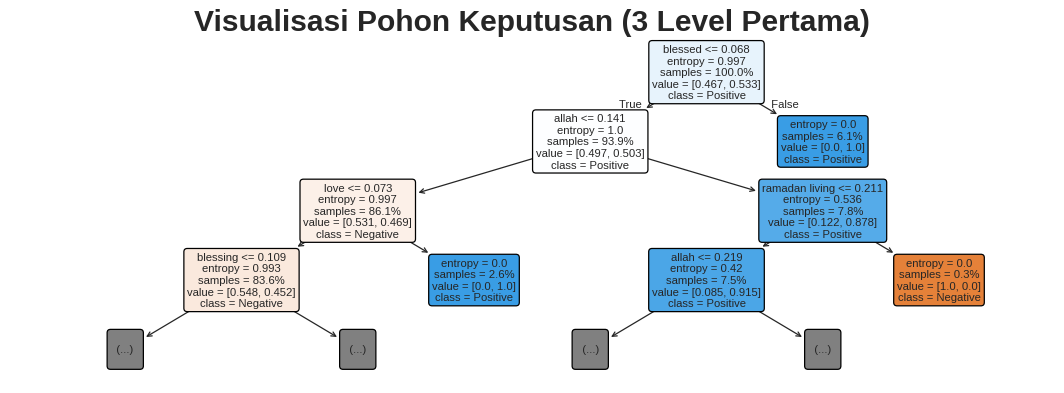

Visualisasi dengan plot_tree telah ditampilkan dan disimpan sebagai 'decision_tree_plot_tree.png'


In [ ]:
plt.figure(figsize=(15, 5), dpi=90) # Tingkatkan ukuran dan DPI untuk detail
plot_tree(
    best_dt_model,
    filled=True,
    feature_names=tfidf.get_feature_names_out(),
    class_names=['Negative', 'Positive'],
    max_depth=3, # Tampilkan 3 level pertama agar tidak terlalu ramai
    fontsize=9,
    proportion=True,
    rounded=True,
    precision=3, # Tingkatkan presisi
    impurity=True,
    label='all'
)
plt.title('Visualisasi Pohon Keputusan (3 Level Pertama)', fontsize=24, fontweight='bold')
plt.savefig("decision_tree_plot_tree.png", dpi=300, bbox_inches='tight') # Simpan gambar
plt.show()
print("Visualisasi dengan plot_tree telah ditampilkan dan disimpan sebagai 'decision_tree_plot_tree.png'")

### **b. Visualisasi dengan `graphviz` (Untuk Potensi Export):**


Ini akan menghasilkan file yang bisa disimpan dan dilihat dengan kualitas lebih baik jika pohonnya kompleks.



Visualisasi pohon keputusan dengan Graphviz telah dirender dan disimpan sebagai 'decision_tree_graphviz.png'


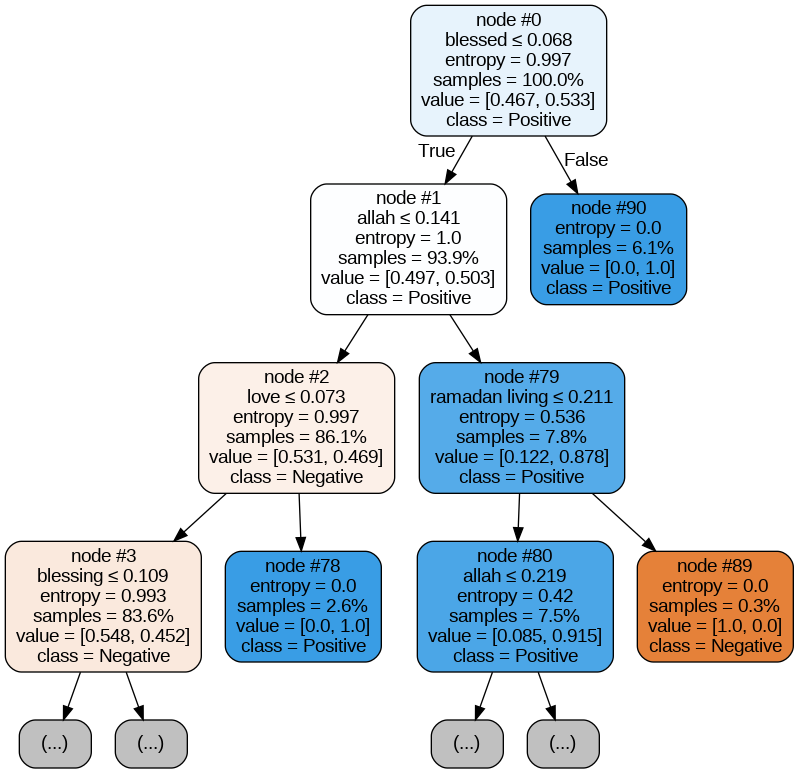

In [ ]:
dot_data = export_graphviz(
    best_dt_model,
    out_file=None,
    feature_names=tfidf.get_feature_names_out(),
    class_names=['Negative', 'Positive'],
    filled=True,
    rounded=True,
    max_depth=3, # Batasi kedalaman untuk Graphviz juga
    special_characters=True,
    proportion=True,
    impurity=True,
    node_ids=True, # Tambahkan ID node
    label='all'
)

graph = graphviz.Source(dot_data, format="png")
try:
    graph.render("decision_tree_graphviz") # Simpan sebagai 'decision_tree_graphviz.png'
    print("\nVisualisasi pohon keputusan dengan Graphviz telah dirender dan disimpan sebagai 'decision_tree_graphviz.png'")
    from IPython.display import Image
    display(Image(filename='decision_tree_graphviz.png'))
except graphviz.backend.execute.CalledProcessError as e:
    print(f"Error saat merender Graphviz: {e}")
    print("Pastikan Graphviz terinstal dan ada di PATH sistem Anda.")
    print("Anda masih bisa mengonversi file 'decision_tree_graphviz.dot' (jika ada) secara manual menggunakan Graphviz.")

## **- Analisis Fitur Penting (Feature Importance Analysis)**


Tahap ini menganalisis fitur (kata atau bigram) mana yang paling berpengaruh dalam membuat keputusan klasifikasi menurut model Decision Tree.



Top 20 Fitur Terpenting Menurut Model Decision Tree:


,Fitur,Pentingnya
81,blessed,0.101496
25,allah,0.091570
454,love,0.050364
85,blessing,0.039338
574,peace,0.030453
128,celebrating,0.028522
336,happy,0.027798
914,wish,0.024815
73,best,0.024250
67,beautiful,0.023711


<ipython-input-153-17f410cb0769>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pentingnya', y='Fitur', data=top_20_features_dt, palette='magma')


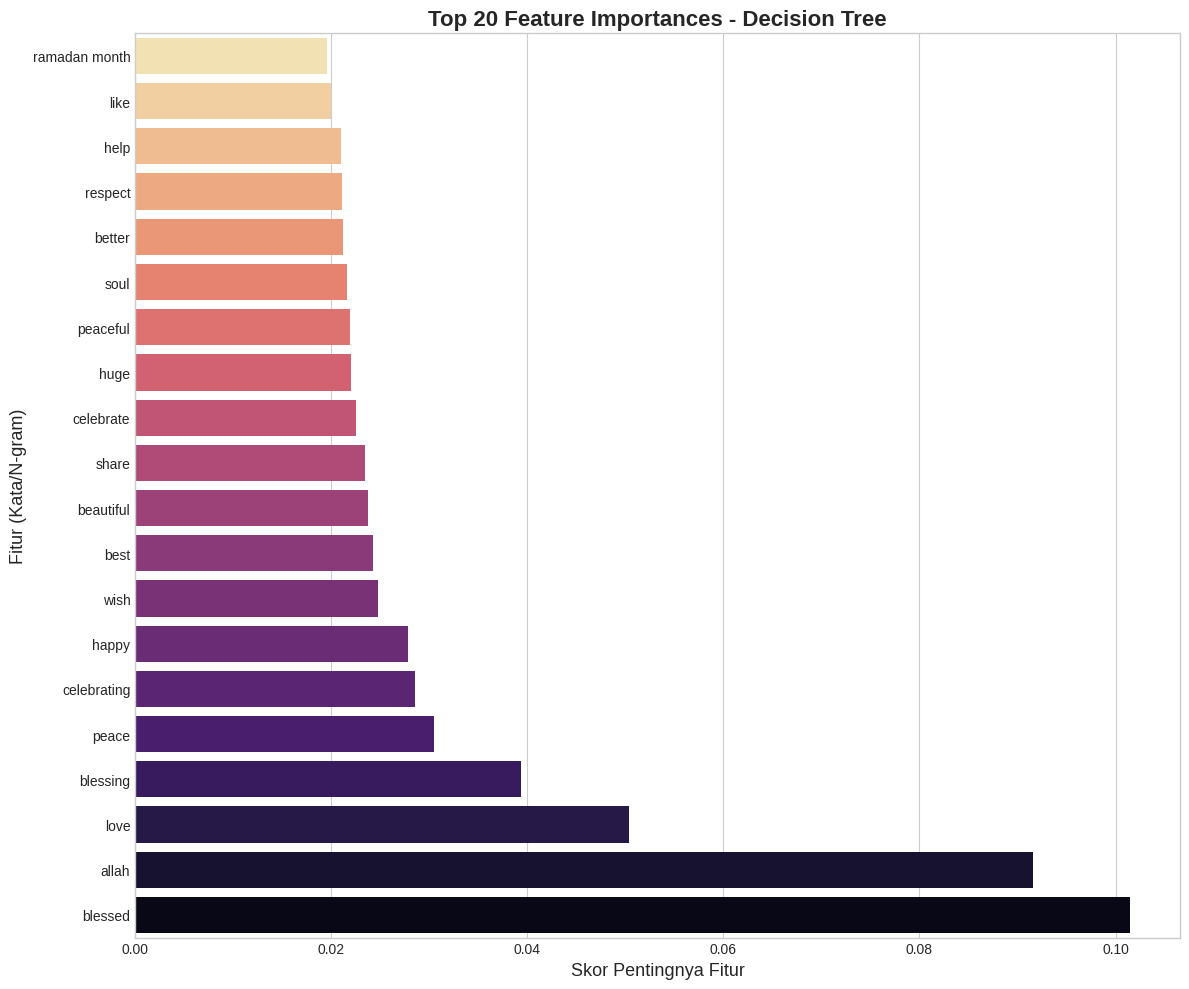

In [ ]:
# Mendapatkan feature importances dari model terbaik
importances_dt = best_dt_model.feature_importances_
feature_names_dt = tfidf.get_feature_names_out()

# Membuat DataFrame
feature_importances_df_dt = pd.DataFrame({
    'Fitur': feature_names_dt,
    'Pentingnya': importances_dt
}).sort_values('Pentingnya', ascending=False)

# Menampilkan 20 fitur terpenting
top_20_features_dt = feature_importances_df_dt.head(20)
print("\nTop 20 Fitur Terpenting Menurut Model Decision Tree:")
display(top_20_features_dt)

# Visualisasi
plt.figure(figsize=(12, 10)) # Sesuaikan ukuran agar label y tidak tumpang tindih
sns.barplot(x='Pentingnya', y='Fitur', data=top_20_features_dt, palette='magma')
plt.title('Top 20 Feature Importances - Decision Tree', fontsize=16, fontweight='bold')
plt.xlabel('Skor Pentingnya Fitur', fontsize=13)
plt.ylabel('Fitur (Kata/N-gram)', fontsize=13)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()